# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.cluster import KMeans

# Importing Dataset

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

# Using Petal (Length and Width) columns without Species Columns

In [6]:
x = data[['PetalLengthCm', 'PetalWidthCm']]

# Training KMeans Model ( Clustering )

In [25]:
model = KMeans(3)
predictions = model.fit_predict(x)
print('our predictions : ', predictions)

C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


our predictions :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [26]:
x.head(5)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Adding Prediction Column in DataFrame

In [28]:
x['predictions'] = predictions

C:\Users\DeeP_LeaRneR\AppData\Local\Temp\ipykernel_8228\3193914382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['predictions'] = predictions


In [29]:
x.head()

,PetalLengthCm,PetalWidthCm,predictions
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


# Specifying Predictions by giving names to it

In [30]:
clust1 = x[x.predictions == 0]
clust2 = x[x.predictions == 1]
clust3 = x[x.predictions == 2]

# Scatter Plotting of Predictions

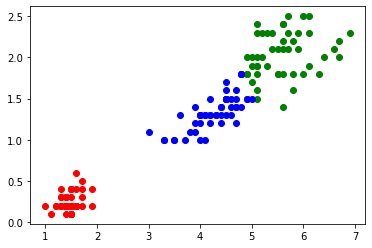

In [33]:
plt.scatter(clust1.PetalLengthCm, clust1.PetalWidthCm, color = 'red')
plt.scatter(clust2.PetalLengthCm, clust2.PetalWidthCm, color = 'green')
plt.scatter(clust3.PetalLengthCm, clust3.PetalWidthCm, color = 'blue')

# Finding inertia of model

In [34]:
model.inertia_

31.387758974358984

### finding inertia 10 times

In [36]:
sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
sse

C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_

[652.6168,
 112.3372,
 31.387758974358984,
 22.65884363044363,
 14.213628146853146,
 11.42859696969697,
 9.297743349632825,
 7.804816714864084,
 6.884481395797188,
 5.965796190806099]

# Plotting inertia's List

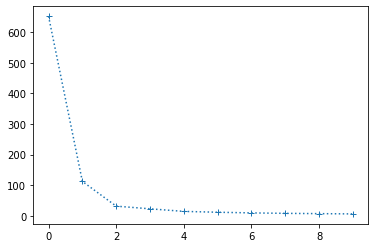

In [40]:
plt.plot(sse, ':+')

# Specifying Centriods

In [43]:
centroids = model.cluster_centers_

# Showing Centroids in Scatter Plotting

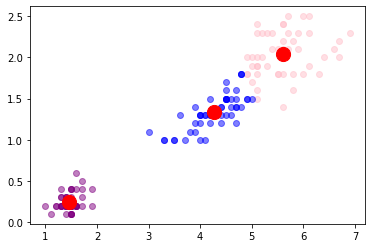

In [47]:
plt.scatter(clust1.PetalLengthCm, clust1.PetalWidthCm, color = 'purple', alpha = 0.5)
plt.scatter(clust2.PetalLengthCm, clust2.PetalWidthCm, color = 'pink', alpha = 0.5)
plt.scatter(clust3.PetalLengthCm, clust3.PetalWidthCm, color = 'blue', alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red', marker = 'o', s = 200)

# Using Sepal (Length and Width) columns without Species Columns

In [50]:
z = data.iloc[:, 1:3]

In [51]:
z.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# Training KMeans Model ( Clustering )

In [62]:
model1 = KMeans(3)
pred = model1.fit_predict(z)
pred

C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Adding Predictions columns to DataFrame

In [63]:
z['pred'] = pred

In [64]:
z.head()

,SepalLengthCm,SepalWidthCm,pred
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


# Specifying Predictions by giving names to it

In [65]:
c1 = z[z.pred == 0]
c2 = z[z.pred == 1]
c3 = z[z.pred == 2]

# Scatter Plotting of Predictions

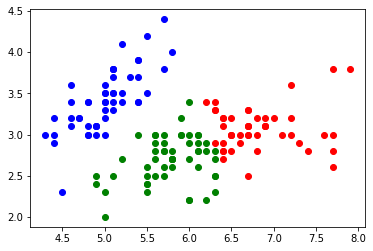

In [66]:
plt.scatter(c1.SepalLengthCm, c1.SepalWidthCm, color = 'blue')
plt.scatter(c2.SepalLengthCm, c2.SepalWidthCm, color = 'green')
plt.scatter(c3.SepalLengthCm, c3.SepalWidthCm, color = 'red')

# finding inertia 10 times

In [67]:
ss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(z)
    ss.append(kmeans.inertia_)

ss

C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\sklearn\cluster\_

[10.804002405002407,
 10.537875000000003,
 10.576337068160596,
 10.422665043290046,
 10.517623313090422,
 10.698093301435406,
 10.618955066533168,
 10.517623313090422,
 10.608922288495819,
 10.544154761904764]

# Plotting inertia

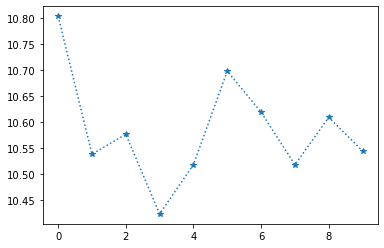

In [69]:
plt.plot(ss, ':*')

# Specifying centriods

In [70]:
centroid2 = model1.cluster_centers_

# Showing Centroids in Scatter Plotting

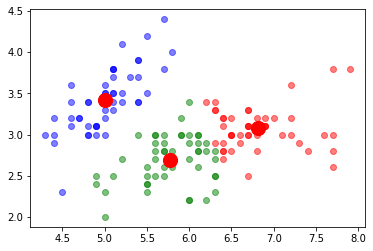

In [72]:
plt.scatter(c1.SepalLengthCm, c1.SepalWidthCm, color = 'blue', alpha = 0.5)
plt.scatter(c2.SepalLengthCm, c2.SepalWidthCm, color = 'green', alpha = 0.5)
plt.scatter(c3.SepalLengthCm, c3.SepalWidthCm, color = 'red', alpha = 0.5)
plt.scatter(centroid2[:, 0], centroid2[:, 1], color = 'red', marker = 'o', s = 200)